In [1]:
Dataset: https://drive.google.com/open?id=1KYonvNO-RkC87A_sa-4pqBNmRI23pzjr


# Importing the required libraries
!pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud
from fractions import Fraction
import re

You should consider upgrading via the 'c:\users\richa\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
#Read the file and add new columns helpfulnessnumerator and helpfulnessdenominator
import json
reviews=[]
for review in open('reviews_Movies_and_TV_5.json','r'):
    reviews.append(json.loads(review))
re=[]
for file in reviews[0:50000]:
    re.append(file)
print(len(re))
df = pd.DataFrame() 
for item in re:
    #dfItem = pd.DataFrame.from_records(item) 
    df = df.append(item, ignore_index=True) 
df[['HelpfulnessNumerator','HelpfulnessDenominator']] = pd.DataFrame(df.helpful.values.tolist(), index = df.index)

50000


In [3]:
#Cleaning the data by eliminating duplicates
df.drop_duplicates(subset=['reviewerID', 'asin','unixReviewTime'],inplace=True)

#Adding the helpfulness and upvote percentages for metrics
df['Helpful %'] = np.where(df['HelpfulnessDenominator'] > 0, df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], -1)
df['% Upvote'] = pd.cut(df['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)
df['Id'] = df.index;
df

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,HelpfulnessNumerator,HelpfulnessDenominator,Helpful %,% Upvote,Id
0,0005019281,"[0, 0]",4.0,This is a charming version of the classic Dick...,"02 26, 2008",ADZPIG9QOCDG5,"Alice L. Larson ""alice-loves-books""",good version of a classic,1.203984e+09,0,0,-1.000000,Empty,0
1,0005019281,"[0, 0]",3.0,It was good but not as emotionally moving as t...,"12 30, 2013",A35947ZP82G7JH,Amarah Strack,Good but not as moving,1.388362e+09,0,0,-1.000000,Empty,1
2,0005019281,"[0, 0]",3.0,"Don't get me wrong, Winkler is a wonderful cha...","12 30, 2013",A3UORV8A9D5L2E,Amazon Customer,Winkler's Performance was ok at best!,1.388362e+09,0,0,-1.000000,Empty,2
3,0005019281,"[0, 0]",5.0,Henry Winkler is very good in this twist on th...,"02 13, 2008",A1VKW06X1O2X7V,"Amazon Customer ""Softmill""",It's an enjoyable twist on the classic story,1.202861e+09,0,0,-1.000000,Empty,3
4,0005019281,"[0, 0]",4.0,This is one of the best Scrooge movies out. H...,"12 22, 2013",A3R27T4HADWFFJ,BABE,Best Scrooge yet,1.387670e+09,0,0,-1.000000,Empty,4
5,0005019281,"[0, 0]",5.0,This has been a favorite movie of mine for a l...,"11 6, 2013",A2L0G56BNOTX6S,barbara whapeles,Dickens updated.,1.383696e+09,0,0,-1.000000,Empty,5
6,0005019281,"[1, 1]",5.0,This is the American adaptation of the Charles...,"12 30, 2008",A5NYUBEKXFLX5,"B. Babb ""kites0852""",A MUST-HAVE FOR ANY VIDEO CHRISTMAS COLLECTION!!,1.230595e+09,1,1,1.000000,80-100%,6
7,0005019281,"[0, 0]",5.0,Glad that this american classic came out on dv...,"12 15, 2009",A2DJ8B8GE4V2VD,Berl S. Meyer,An American Christmas Carol,1.260835e+09,0,0,-1.000000,Empty,7
8,0005019281,"[0, 0]",5.0,A good Christmas carol dhenry winkler one duri...,"12 5, 2013",AWF2S3UNW9UA0,beth holman,an american christmas carol,1.386202e+09,0,0,-1.000000,Empty,8
9,0005019281,"[0, 0]",5.0,How a bitter old man comes to know the true me...,"09 21, 2013",A3O4UUT83DG3OU,Bettylou Sperling,Fantastic!,1.379722e+09,0,0,-1.000000,Empty,9


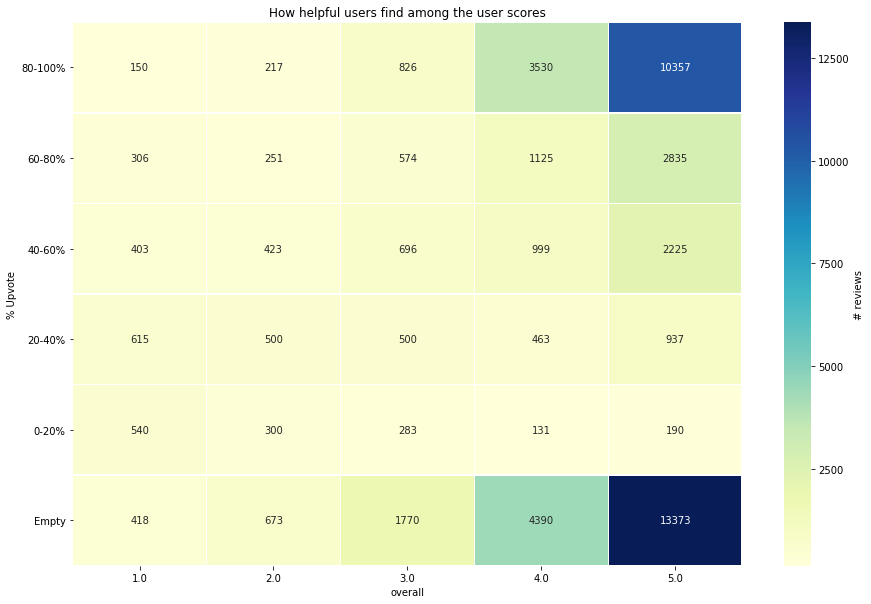

In [4]:
df_s = df.groupby(['overall', '% Upvote']).agg({'Id': 'count'})
df_s = df_s.unstack()
df_s.columns = df_s.columns.get_level_values(1)
fig = plt.figure(figsize=(15,10))

sns.heatmap(df_s[df_s.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('How helpful users find among the user scores')
plt.show()

In [5]:
df1 =  df[df['overall'] != 3]
X = df1['reviewText']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df1['overall'].map(y_dict)

In [6]:
c = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    
text_fit(X, y, c, LogisticRegression())

# features: 90913
# train records: 34013
# test records: 11338


C:\Users\RICHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy: 0.9319103898394778

-Top 20 positive-
        Word  Coefficient
     critics     1.572148
      highly     1.477260
     amazing     1.430304
     pleased     1.408427
   favorites     1.387812
      unique     1.332782
     perfect     1.307081
   excellent     1.284446
        seat     1.254044
      season     1.221470
 experiences     1.196260
 exceptional     1.175276
      forces     1.160231
       glued     1.155092
 wonderfully     1.150915
         fun     1.143232
       price     1.138527
   universal     1.138145
     enjoyed     1.123260
      superb     1.111833

-Top 20 negative-
           Word  Coefficient
       horrible    -1.534022
           load    -1.551638
         barely    -1.617900
           lame    -1.632210
      pointless    -1.653396
        garbage    -1.675981
      overrated    -1.691055
          tried    -1.702071
         ruined    -1.747680
          stick    -1.790976
     irritating    -1.873664
         wasted    -1.963244
    

In [7]:
text_fit(X, y, c, DummyClassifier(),0)

# features: 90913
# train records: 34013
# test records: 11338
Model Accuracy: 0.8053448579996472


In [8]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 90913
# train records: 34013
# test records: 11338


C:\Users\RICHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy: 0.923796083965426

-Top 20 positive-
       Word  Coefficient
      great     6.590488
       best     4.711295
  excellent     4.684283
       love     4.313849
        fun     4.246660
   favorite     4.024393
    classic     3.958968
    enjoyed     3.588916
    perfect     3.506895
      loved     3.356503
    amazing     3.316846
  wonderful     3.111725
       life     3.098832
        job     3.035529
 collection     3.008204
     highly     3.003447
  beautiful     2.669890
     superb     2.501089
      times     2.384435
    awesome     2.382817

-Top 20 negative-
          Word  Coefficient
         worse    -3.336892
         money    -3.362044
 disappointing    -3.379653
      supposed    -3.409083
          didn    -3.447681
         tried    -3.510819
          lame    -3.598659
        stupid    -3.676416
        wasted    -3.686811
          save    -3.720254
       minutes    -3.972586
          poor    -4.258877
      terrible    -4.280801
      horri

In [9]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

# features: 2188938
# train records: 34013
# test records: 11338


C:\Users\RICHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy: 0.9065972834715117

-Top 20 positive-
       Word  Coefficient
      great     7.913827
       best     5.138956
       love     5.009197
  excellent     4.499764
    classic     4.179795
        fun     4.048997
   favorite     3.954145
      loved     3.373241
       life     3.333403
    enjoyed     3.307251
  wonderful     3.242258
    perfect     3.091315
 collection     3.053609
    amazing     2.928411
        job     2.639306
     highly     2.575937
      enjoy     2.543894
  beautiful     2.453286
      times     2.318167
      world     2.301086

-Top 20 negative-
       Word  Coefficient
       lame    -3.168600
       save    -3.186144
   supposed    -3.191893
     script    -3.352502
       plot    -3.486569
 waste time    -3.796195
      money    -3.975043
    minutes    -4.062818
       poor    -4.073767
    instead    -4.113559
       didn    -4.322996
   horrible    -4.367567
      awful    -4.370947
   terrible    -4.605690
     stupid    -4.695604
  

In [10]:
#Upvote prediction
#Analysing the pattern of downvotes by users to predict upvotes of the products

In [11]:
df1 = df1[df1['overall'] == 5]
df1 = df1[df1['% Upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
df1.shape

X = df1['reviewText']
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = df1['% Upvote'].map(y_dict)

print('Class distribution:')
print(y.value_counts())

Class distribution:
1    13192
0     1127
Name: % Upvote, dtype: int64


In [12]:
df_s = pd.DataFrame(data = [X,y]).T

Downvote_records = len(df_s[df_s['% Upvote'] == 0])
Downvote_indices = np.array(df_s[df_s['% Upvote'] == 0].index)

Upvote_indices = df_s[df_s['% Upvote'] == 1].index

random_upvote_indices = np.random.choice(Upvote_indices, Downvote_records, replace = False)
random_upvote_indices = np.array(random_upvote_indices)

under_sample_indices = np.concatenate([Downvote_indices,random_upvote_indices])

under_sample_data = df_s.loc[under_sample_indices, :]
X_u = under_sample_data['reviewText']
under_sample_data['% Upvote'] = under_sample_data['% Upvote'].astype(int)
y_u = under_sample_data['% Upvote']


print("Percentage of upvote transactions: ", len(under_sample_data[under_sample_data['% Upvote'] == 1])/len(under_sample_data))
print("Percentage of downvote transactions: ", len(under_sample_data[under_sample_data['% Upvote'] == 0])/len(under_sample_data))
print("Total number of records in resampled data: ", len(under_sample_data))

Percentage of upvote transactions:  0.5
Percentage of downvote transactions:  0.5
Total number of records in resampled data:  2254


In [13]:
#Now, the similar operations as above are performed on the resampled data to measure accuracy of the model
c = CountVectorizer(stop_words = 'english')

text_fit(X_u, y_u, c, LogisticRegression())


# features: 24118
# train records: 1690
# test records: 564
Model Accuracy: 0.6560283687943262

-Top 20 positive-
         Word  Coefficient
         view     0.955150
     transfer     0.923263
      romance     0.870677
         ways     0.858689
        loves     0.850626
        hanks     0.848723
     kurosawa     0.822437
    fantastic     0.820829
       nudity     0.789792
 entertaining     0.773666
      husband     0.754303
        enjoy     0.743890
         nice     0.722181
         high     0.721499
  recommended     0.717955
     lawrence     0.700315
      moments     0.700288
   definitely     0.678446
         cast     0.674862
     powerful     0.674026

-Top 20 negative-
          Word  Coefficient
          went    -0.589773
          jaws    -0.593035
         water    -0.598778
 granddaughter    -0.603109
       twisted    -0.607916
          alot    -0.610039
         crazy    -0.610457
           mel    -0.617924
       usually    -0.619579
        credit    -0

C:\Users\RICHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
#Now, the same is performed with n-grams and tf-idf vectorizer
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')

text_fit(X_u, y_u, tfidf_n, LogisticRegression())

# features: 188403
# train records: 1690
# test records: 564
Model Accuracy: 0.6719858156028369


C:\Users\RICHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



-Top 20 positive-
        Word  Coefficient
        quot     1.134648
        film     0.968889
    lawrence     0.804615
   character     0.775404
     husband     0.719163
        high     0.709594
       years     0.678416
        cast     0.677747
        disc     0.674271
       story     0.642354
 performance     0.627076
      comedy     0.626896
       enjoy     0.624779
      scenes     0.613950
    kurosawa     0.611468
        make     0.609003
       young     0.607602
       music     0.596624
       scene     0.594380
          34     0.578757

-Top 20 negative-
        Word  Coefficient
   buy movie    -0.400601
    angelina    -0.402659
       books    -0.417883
    don miss    -0.424717
        miss    -0.430680
         guy    -0.434917
      matrix    -0.436029
        alot    -0.458269
        said    -0.471567
      better    -0.484193
       liked    -0.490509
       jolie    -0.491085
      cruise    -0.517260
    magnolia    -0.528941
        jaws    -0.571292


In [15]:
#The accuracy has not improved, and still has some words which don't indicate polarity in the top 10/20.
#Effect of non-contextual features

In [16]:
#pd.set_option('display.max_colwidth', -1)
print('Downvote score 5 comments examples:')
print(under_sample_data[under_sample_data['% Upvote']==0]['reviewText'].iloc[:100:20])
print('Upvote score 5 comments examples')
print(under_sample_data[under_sample_data['% Upvote']==1]['reviewText'].iloc[:100:20])

Downvote score 5 comments examples:
254     It's So Cool. I Seen It Befor On Tv. And It Wa...
700     all of the negative reviews i have read about ...
1001    religion department at my school is pleased to...
1347    This film shows us what our Lord and Saviour d...
2604    With 119 reviews about this movie already writ...
Name: reviewText, dtype: object
Upvote score 5 comments examples
36944    It's funny. Often.  Also interesting. It's a k...
7647     Elliott Rosen is an obsessive prosecutor who i...
43840    spawn was an animated series that hbo aired ev...
41244    Great! You can't go wrong spending 90 minutes ...
13501    In this movie we see Charlie, a High School st...
Name: reviewText, dtype: object


In [17]:
under_sample_data['word_count'] = under_sample_data['reviewText'].apply(lambda x: len(x.split()))
under_sample_data['capital_count'] = under_sample_data['reviewText'].apply(lambda x: sum(1 for c in x if c.isupper()))
under_sample_data['question_mark'] = under_sample_data['reviewText'].apply(lambda x: sum(1 for c in x if c == '?'))
under_sample_data['exclamation_mark'] = under_sample_data['reviewText'].apply(lambda x: sum(1 for c in x if c == '!'))
under_sample_data['punctuation'] = under_sample_data['reviewText'].apply(lambda x: sum(1 for c in x if c in punctuation))

print(under_sample_data.groupby('% Upvote').agg({'word_count': 'mean', 'capital_count': 'mean', 'question_mark': 'mean', 'exclamation_mark': 'mean', 'punctuation': 'mean'}).T)

X_num = under_sample_data[under_sample_data.columns.difference(['% Upvote', 'reviewText'])]
y_num = under_sample_data['% Upvote']

% Upvote                   0           1
word_count        141.211180  229.500444
capital_count      35.216504   41.692990
question_mark       0.312334    0.411713
exclamation_mark    0.997338    0.804791
punctuation        25.867791   40.505768


In [18]:
#Training the model to predict
#The model is now trained to predict upvotes

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y_num, random_state=0)

clf_lr = LogisticRegression().fit(X_train, y_train)
acc_lr = clf_lr.score(X_test, y_test)
print('Logistic Regression accuracy: {}'.format(acc_lr))

clf_svm = svm.SVC().fit(X_train, y_train)
acc_svm = clf_svm.score(X_test, y_test)
print('SVM accuracy: {}'.format(acc_svm))

Logistic Regression accuracy: 0.6453900709219859


C:\Users\RICHA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM accuracy: 0.5709219858156028


In [20]:
#Accuracy is lower than the count feature and so, it can be determined that these non-contextual features are not the right choice to perform the prediction

#Study of user behavior
#The user behavior has to be analyzed to improve the model performance and understand the underlying reasons for the bad or good reviews. This also gives importance to word choices of a user when giving the reviews.

df_user = df.groupby(['reviewerID']).agg({'overall':['count', 'mean']})
df_user.columns = df_user.columns.get_level_values(1)
df_user.columns = ['Rating count', 'Rating mean']
df_user = df_user.sort_values(by = 'Rating count', ascending = False)
print(df_user.head(10))

                Rating count  Rating mean
reviewerID                               
ANCOMAI0I7LVG            129     3.922481
A16CZRQL23NOIW           120     4.766667
A3LZGLA88K0LA0            98     3.877551
A39CX0EE4BZCZC            92     4.250000
A10ODC971MDHV8            89     5.000000
A3UDYY6L2NH3JS            85     4.470588
A3R2YB0WTTB0IJ            76     4.131579
A1X054KUYG5V              71     3.633803
A35ZK3M8L9JUPX            70     4.900000
A1PASRZ81DY9C             63     3.396825


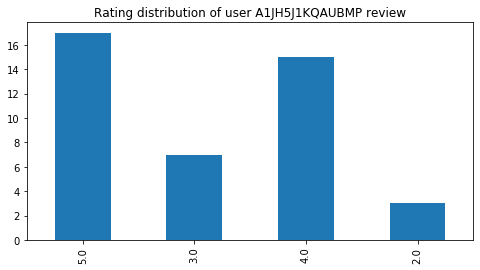

In [21]:
#A1JH5J1KQAUBMP is randomly chosen
def plot_user(reviewerID):
    df_1user = df[df['reviewerID'] == reviewerID]['overall']
    df_1user_plot = df_1user.value_counts(sort=False)
    ax = df_1user_plot.plot(kind = 'bar', figsize = (8,4), title = 'Rating distribution of user {} review'.format(df[df['reviewerID'] == reviewerID]['reviewerID'].iloc[0]))
    plt.show()

plot_user('A1JH5J1KQAUBMP')

In [22]:
print(df_user[(df_user['Rating mean']<3.5) & (df_user['Rating mean']>2.5)].head())

                Rating count  Rating mean
reviewerID                               
A1PASRZ81DY9C             63     3.396825
A2EDZH51XHFA9B            61     3.229508
A2R4XG0L7Z01V8            55     3.181818
A82LIVYSX6WZ9             49     3.408163
A152C8GYY25HAH            45     3.377778


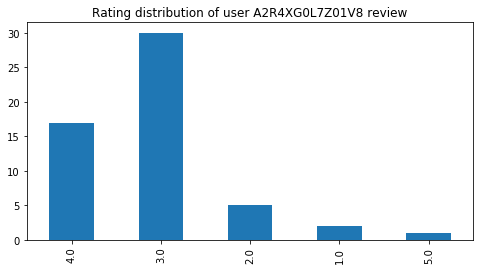

In [23]:
#Now, one of the users with mean rating near 3 (A1RRMZKOMZ2M7J) is chosen to perform the analysis
plot_user('A2R4XG0L7Z01V8')

In [24]:
#Most popular words used by the user for different ratings are observed. (2-grams and 3-grams are chosen for analysis)


def get_token_ngram(score, benchmark, userid='all'):

    if userid != 'all':
        df1 = df[(df['reviewerID'] == userid) & (df['overall'] == score)]['reviewText']
    else:
        df1 = df[df['overall'] == score]['reviewText']
        
    count = len(df1)
    total_text = ' '.join(df1)
    total_text = total_text.lower()
    stop = set(stopwords.words('english'))
    total_text = nltk.word_tokenize(total_text)
    total_text = [word for word in total_text if word not in stop and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    total_text = [lemmatizer.lemmatize(w,'v') for w in total_text]
    bigrams = ngrams(total_text,2)
    trigrams = ngrams(total_text, 3)

    # look at 2-gram and 3-gram together
    combine = chain(bigrams, trigrams)
    text = nltk.Text(combine)
    fdist = nltk.FreqDist(text)
    
    # return only phrase occurs more than benchmark of his reviews
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(text) if fdist[w] >= count*benchmark], key=lambda x: -x[1])

# score 1-5 reviews with this user
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = get_token_ngram(j, 0.25, 'A1PASRZ81DY9C')
    print('score {} reviews most popular 2-gram / 3-gram:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    #test = test.sort_values('Count', ascending=False)
    print(test)

score 1 reviews most popular 2-gram / 3-gram:
    Count Occur %                          Phrase
0     7.0   87.5%                (mouth, madness)
1     7.0   87.5%               (john, carpenter)
2     6.0   75.0%            (final, destination)
3     5.0   62.5%             (schlock, corridor)
4     5.0   62.5%               (passion, christ)
5     3.0   37.5%                 (gregory, peck)
6     3.0   37.5%                 (create, woman)
7     3.0   37.5%                   (god, create)
8     3.0   37.5%            (god, create, woman)
9     3.0   37.5%              (..., god, create)
10    3.0   37.5%         (john, carpenter, film)
11    3.0   37.5%             (stool, boognolias)
12    3.0   37.5%                      (..., god)
13    3.0   37.5%               (carpenter, film)
14    2.0   25.0%           (watch, movies, make)
15    2.0   25.0%                 (gun, navarone)
16    2.0   25.0%               (cinema, classic)
17    2.0   25.0%                      ('ve, see)
18  

In [25]:
#Now, the popular words for all users are observed


# score 1-5 reviews with all users
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    # easier benchmark since we have many different users here, thus different phrase
    d = get_token_ngram(j, 0.03)
    print('score {} reviews most popular 2-gram / 3-gram:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    test = test.sort_values('Count', ascending=False)
    print(test)

score 1 reviews most popular 2-gram / 3-gram:
    Count Occur %             Phrase
0   179.0   7.36%       (look, like)
1   178.0   7.32%        (n't, even)
2   177.0   7.28%       (could, n't)
3   154.0   6.33%      (waste, time)
4   128.0   5.26%  (special, effect)
5   118.0   4.85%        (ever, see)
6   114.0   4.69%         (n't, get)
7   113.0   4.65%        (n't, know)
8   107.0    4.4%       (movie, n't)
9   103.0   4.24%         (..., ...)
10  102.0   4.19%     (watch, movie)
11   94.0   3.87%       (one, worst)
12   91.0   3.74%        (want, see)
13   87.0   3.58%      (movie, make)
14   84.0   3.45%       (would, n't)
15   83.0   3.41%      (make, movie)
16   83.0   3.41%       (see, movie)
17   78.0   3.21%      (like, movie)
18   77.0   3.17%      (make, sense)
19   76.0   3.12%        (one, star)
20   74.0   3.04%         (n't, see)
score 2 reviews most popular 2-gram / 3-gram:
    Count Occur %             Phrase
0   160.0   6.77%  (special, effect)
1   151.0   6.39%   

In [26]:
#Now, only the adjectives are taken into consideration, as those express opinion and nouns don't.

def get_token_adj(score, benchmark, userid='all'):
    
    if userid != 'all':
        df1 = df[(df['reviewerID'] == userid) & (df['overall'] == score)]['reviewText']
    else:
        df1 = df[df['overall'] == score]['reviewText']
        
    count = len(df1)
    total_text = ' '.join(df1)
    total_text = total_text.lower()
    stop = set(stopwords.words('english'))
    total_text = nltk.word_tokenize(total_text)
    total_text = [word for word in total_text if word not in stop and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    total_text = [lemmatizer.lemmatize(w,'a') for w in total_text]
    # get adjective only
    total_text = [word for word, form in nltk.pos_tag(total_text) if form == 'JJ']
    
    text = nltk.Text(total_text)
    fdist = nltk.FreqDist(text)
    
    # return only phrase occurs more than benchmark of his reviews
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(text) if fdist[w] >= count*benchmark], key=lambda x: -x[1])

In [27]:
# score 1-5 reviews with this user
import nltk
nltk.download('averaged_perceptron_tagger')
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = get_token_adj(j, 0.25,'A1PASRZ81DY9C')
    print('score {} reviews most popular adjectives word:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    #test = test.sort_values('Count', ascending=False)
    print(test)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\RICHA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


score 1 reviews most popular adjectives word:
    Count Occur %     Phrase
0     9.0  112.5%       good
1     8.0  100.0%        bad
2     6.0   75.0%      final
3     6.0   75.0%       many
4     4.0   50.0%   horrible
5     3.0   37.5%      great
6     3.0   37.5%     fourth
7     3.0   37.5%       late
8     3.0   37.5%       hard
9     3.0   37.5%       much
10    3.0   37.5%     strong
11    3.0   37.5%      mouth
12    2.0   25.0%  halloween
13    2.0   25.0%      whole
14    2.0   25.0%       full
15    2.0   25.0%       huge
16    2.0   25.0%    classic
17    2.0   25.0%    madness
18    2.0   25.0%       true
19    2.0   25.0%     entire
20    2.0   25.0%     parton
21    2.0   25.0%      first
22    2.0   25.0%        big
score 2 reviews most popular adjectives word:
    Count  Occur %     Phrase
0    29.0  207.14%       good
1    11.0   78.57%       much
2    10.0   71.43%        bad
3     5.0   35.71%      great
4     5.0   35.71%     second
5     5.0   35.71%   jurassic
6 

In [298]:

#Movie based collaberative filtering
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk

from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error



In [299]:
print(df.columns)
print(df.shape)

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Helpful %', '% Upvote', 'Id'],
      dtype='object')
(50000, 14)


In [300]:
#Product based CF
count = df.groupby("asin", as_index=False).count()
mean = df.groupby("asin", as_index=False).mean()

dfMerged = pd.merge(df, count, how='right', on=['asin'])
dfMerged

,asin,helpful_x,overall_x,reviewText_x,reviewTime_x,reviewerID_x,reviewerName_x,summary_x,unixReviewTime_x,HelpfulnessNumerator_x,...,reviewTime_y,reviewerID_y,reviewerName_y,summary_y,unixReviewTime_y,HelpfulnessNumerator_y,HelpfulnessDenominator_y,Helpful %_y,% Upvote_y,Id_y
0,0005019281,"[0, 0]",4.0,This is a charming version of the classic Dick...,"02 26, 2008",ADZPIG9QOCDG5,"Alice L. Larson ""alice-loves-books""",good version of a classic,1.203984e+09,0,...,109,109,109,109,109,109,109,109,109,109
1,0005019281,"[0, 0]",3.0,It was good but not as emotionally moving as t...,"12 30, 2013",A35947ZP82G7JH,Amarah Strack,Good but not as moving,1.388362e+09,0,...,109,109,109,109,109,109,109,109,109,109
2,0005019281,"[0, 0]",3.0,"Don't get me wrong, Winkler is a wonderful cha...","12 30, 2013",A3UORV8A9D5L2E,Amazon Customer,Winkler's Performance was ok at best!,1.388362e+09,0,...,109,109,109,109,109,109,109,109,109,109
3,0005019281,"[0, 0]",5.0,Henry Winkler is very good in this twist on th...,"02 13, 2008",A1VKW06X1O2X7V,"Amazon Customer ""Softmill""",It's an enjoyable twist on the classic story,1.202861e+09,0,...,109,109,109,109,109,109,109,109,109,109
4,0005019281,"[0, 0]",4.0,This is one of the best Scrooge movies out. H...,"12 22, 2013",A3R27T4HADWFFJ,BABE,Best Scrooge yet,1.387670e+09,0,...,109,109,109,109,109,109,109,109,109,109
5,0005019281,"[0, 0]",5.0,This has been a favorite movie of mine for a l...,"11 6, 2013",A2L0G56BNOTX6S,barbara whapeles,Dickens updated.,1.383696e+09,0,...,109,109,109,109,109,109,109,109,109,109
6,0005019281,"[1, 1]",5.0,This is the American adaptation of the Charles...,"12 30, 2008",A5NYUBEKXFLX5,"B. Babb ""kites0852""",A MUST-HAVE FOR ANY VIDEO CHRISTMAS COLLECTION!!,1.230595e+09,1,...,109,109,109,109,109,109,109,109,109,109
7,0005019281,"[0, 0]",5.0,Glad that this american classic came out on dv...,"12 15, 2009",A2DJ8B8GE4V2VD,Berl S. Meyer,An American Christmas Carol,1.260835e+09,0,...,109,109,109,109,109,109,109,109,109,109
8,0005019281,"[0, 0]",5.0,A good Christmas carol dhenry winkler one duri...,"12 5, 2013",AWF2S3UNW9UA0,beth holman,an american christmas carol,1.386202e+09,0,...,109,109,109,109,109,109,109,109,109,109
9,0005019281,"[0, 0]",5.0,How a bitter old man comes to know the true me...,"09 21, 2013",A3O4UUT83DG3OU,Bettylou Sperling,Fantastic!,1.379722e+09,0,...,109,109,109,109,109,109,109,109,109,109


In [301]:
dfMerged["totalReviewers"] = dfMerged["reviewerID_y"]
dfMerged["overallScore"] = dfMerged["overall_x"]
dfMerged["summaryReview"] = dfMerged["summary_x"]

dfNew = dfMerged[['asin','summaryReview','overallScore',"totalReviewers"]]

In [302]:
#Selecting movies which have more than 50 reviews

dfMerged = dfMerged.sort_values(by='totalReviewers', ascending=False)
dfCount = dfMerged[dfMerged.totalReviewers >= 50]
dfCount

,asin,helpful_x,overall_x,reviewText_x,reviewTime_x,reviewerID_x,reviewerName_x,summary_x,unixReviewTime_x,HelpfulnessNumerator_x,...,summary_y,unixReviewTime_y,HelpfulnessNumerator_y,HelpfulnessDenominator_y,Helpful %_y,% Upvote_y,Id_y,totalReviewers,overallScore,summaryReview
1373,0310263662,"[21, 44]",1.0,After so many glorious and watered-down depict...,"09 23, 2005",A359IT81FBX64Y,Steven Mason,The Passion of the Sadists,1.127434e+09,21,...,959,959,959,959,959,959,959,959,1.0,The Passion of the Sadists
984,0310263662,"[0, 1]",5.0,Passion of the Christ is a film which takes us...,"04 11, 2013",A9ARJBLYBZJ0I,joyful,Spiritually Riveting!,1.365638e+09,0,...,959,959,959,959,959,959,959,959,5.0,Spiritually Riveting!
993,0310263662,"[2, 6]",5.0,I don't really want to talk about the religiou...,"03 11, 2008",A2SNUORW55MZWO,J-Train,Incredible Film,1.205194e+09,2,...,959,959,959,959,959,959,959,959,5.0,Incredible Film
992,0310263662,"[5, 8]",4.0,I held off watching this movie because I had h...,"01 16, 2005",A3AAX9AO0CIFBI,J. Taylor,Well worth watching,1.105834e+09,5,...,959,959,959,959,959,959,959,959,4.0,Well worth watching
991,0310263662,"[5, 5]",5.0,Controversy.Truth.Faith.Love.Hate.Lies.Confusi...,"02 19, 2005",A26B84TWSC1GTG,"J. Sumaran ""Roach""",A Passion,1.108771e+09,5,...,959,959,959,959,959,959,959,959,5.0,A Passion
990,0310263662,"[9, 14]",4.0,What the world needs now is one more opinion o...,"08 14, 2006",ARLKYF9JL3QKB,J. SHARP,A tough film to view objectively. Maybe that's...,1.155514e+09,9,...,959,959,959,959,959,959,959,959,4.0,A tough film to view objectively. Maybe that's...
989,0310263662,"[1, 2]",5.0,So much has all ready been said about The Pass...,"02 25, 2004",A1LVZOK9F7K4CN,JR Pinto,An open mind...,1.077667e+09,1,...,959,959,959,959,959,959,959,959,5.0,An open mind...
988,0310263662,"[1, 2]",5.0,An excellent movie. No more can really be said...,"12 9, 2007",A3GOJEQ3SSLTY6,J. Rootellis,Very engaging,1.197158e+09,1,...,959,959,959,959,959,959,959,959,5.0,Very engaging
987,0310263662,"[3, 5]",5.0,I have never in my life had a movie-going expe...,"06 15, 2004",A33UOIP7UFFURZ,J. Preece,Most moving film I've ever seen,1.087258e+09,3,...,959,959,959,959,959,959,959,959,5.0,Most moving film I've ever seen
986,0310263662,"[4, 9]",4.0,Of course it is! it's the story of the son of ...,"09 14, 2004",A3S1G5T9NBTPTM,"J. P. Gopal ""jon.id.au""",A little too religious perhaps?,1.095120e+09,4,...,959,959,959,959,959,959,959,959,4.0,A little too religious perhaps?


In [303]:
#Grouping all the summary Reviews by movie ID
dfProductReview = df.groupby("asin", as_index=False).mean()
ProductReviewSummary = dfCount.groupby("asin")["summaryReview"].apply(list)
ProductReviewSummary = pd.DataFrame(ProductReviewSummary)
ProductReviewSummary.to_csv("ProductReviewSummary.csv")

In [304]:
dfProductReview

,asin,overall,unixReviewTime,HelpfulnessNumerator,HelpfulnessDenominator,Helpful %,Id
0,0005019281,4.458716,1.314341e+09,1.220183,1.642202,-0.594219,54.0
1,0005119367,4.793478,1.272987e+09,5.163043,5.576087,0.410921,154.5
2,0307141985,4.800000,1.163255e+09,13.600000,14.000000,0.970833,203.0
3,0307142469,4.750000,1.264764e+09,1.875000,2.275000,-0.100849,225.5
4,0307142477,2.333333,1.085630e+09,2.833333,5.000000,0.547222,248.5
5,0307142485,4.666667,1.255141e+09,4.092593,5.925926,0.014682,278.5
6,0307142493,4.775862,1.241273e+09,1.810345,2.413793,-0.277410,334.5
7,0307514161,4.732283,1.229313e+09,3.669291,4.322835,0.171339,427.0
8,0307554066,3.777778,1.083384e+09,25.000000,30.000000,0.688711,499.5
9,0307593908,4.500000,1.314583e+09,12.083333,14.416667,0.059210,514.5


In [305]:
df3 = pd.read_csv("ProductReviewSummary.csv")
df3 = pd.merge(df3, dfProductReview, on="asin", how='inner')

In [306]:
df3 = df3[['asin','summaryReview','overall']]

In [307]:
#Text Cleaning - Summary column
#function for tokenizing summary
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RICHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [308]:
#reset index and drop duplicate rows
df3["summaryClean"] = df3["summaryReview"].apply(cleanReviews)
df3 = df3.drop_duplicates(['overall'], keep='last')
df3 = df3.reset_index()

In [309]:
reviews = df3["summaryClean"] 
countVector = CountVectorizer(max_features = 300, stop_words='english') 
transformedReviews = countVector.fit_transform(reviews) 

dfReviews = DataFrame(transformedReviews.A, columns=countVector.get_feature_names())
dfReviews = dfReviews.astype(int)

In [310]:
#save 
dfReviews.to_csv("dfReviews.csv")

In [311]:
dfReviews

,absolute,absolutely,acting,action,adam,adaptation,adventure,age,allen,amazing,...,wonderful,woody,work,world,worst,worth,wow,wrong,years,yes
0,0,0,0,0,0,4,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,2,0,1,...,2,0,1,0,0,1,0,0,0,0
5,1,2,1,1,0,0,0,0,0,10,...,3,0,5,4,4,8,10,1,2,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,1,0,0,0,0,0,0,12,0,...,0,20,1,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [312]:
!pip install textblob
from textblob import TextBlob
senti_word={}
for words in dfReviews.columns:
    senti_word[words]=TextBlob(words).sentiment[0]

You should consider upgrading via the 'c:\users\richa\anaconda3\python.exe -m pip install --upgrade pip' command.


In [313]:
#Word correlation based on cluster
cluster = df.groupby("overall")["summary"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["Summary_Clean"] = cluster1["summary"].apply(cleanReviews)

In [314]:
#World Clouding for Each Score Group
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

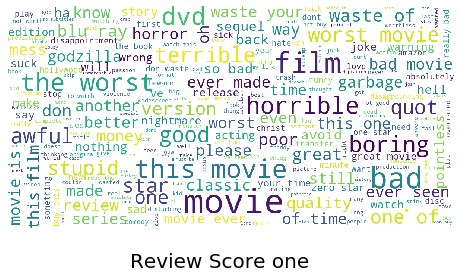

In [315]:
show_wordcloud(cluster1["Summary_Clean"][0], title = "Review Score one ")

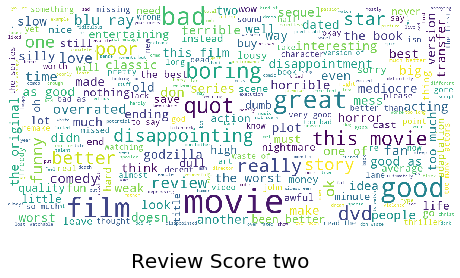

In [316]:
show_wordcloud(cluster1["Summary_Clean"][1], title = "Review Score two ")

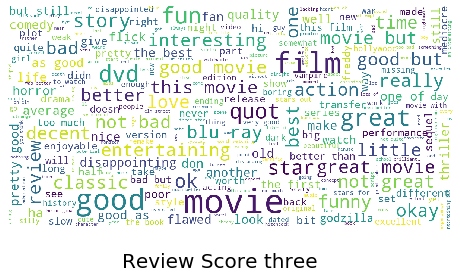

In [317]:
show_wordcloud(cluster1["Summary_Clean"][2], title = "Review Score three ")

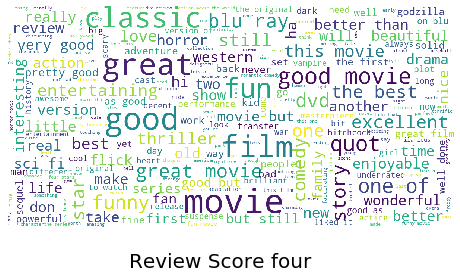

In [318]:
show_wordcloud(cluster1["Summary_Clean"][3], title = "Review Score four ")

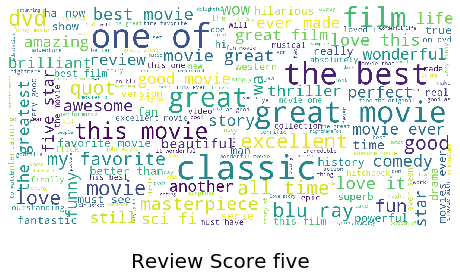

In [319]:
show_wordcloud(cluster1["Summary_Clean"][4], title = "Review Score five ")

In [320]:
for i in range(0,160):
    for j in dfReviews.columns:
        if(senti_word[j]!=0):
            dfReviews.loc[i][j]=dfReviews.loc[i][j]*senti_word[j]

In [321]:
# First let's create a dataset called X
X = np.array(dfReviews)
 # create train and test
tpercent = 0.9
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

In [322]:
# KNN classifier to find similar products
print(lentrain)
print(lentest)

271
31


In [323]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [324]:
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on movie reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar movie is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar movie is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on movie reviews, for  0783116926  average rating is  4.619289340101523
The first similar movie is  078062856X  average rating is  4.072289156626506
The second similar movie is  0780656946  average rating is  3.6511627906976742
-----------------------------------------------------------
Based on movie reviews, for  0783116934  average rating is  4.582417582417582
The first similar movie is  0767821637  average rating is  4.642857142857143
The second similar movie is  0767807588  average rating is  4.067796610169491
-----------------------------------------------------------
Based on movie reviews, for  0783117388  average rating is  4.127118644067797
The first similar movie is  0782009123  average rating is  4.2407407407407405
The second similar movie is  0780631234  average rating is  3.7540983606557377
-----------------------------------------------------------
Based on movie reviews, for  0783201672  average rating is  4.113924050632911
The first similar movie is  0767819462  

In [325]:
print("Enter the movie id(asin) to know the related movie")
inp=input()

Enter the movie id(asin) to know the related movie
0783222734


In [326]:
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]
    
    first_related_product = [item[0] for item in related_product_list]
    
    
    first_related_product = str(first_related_product).strip('[]')
    
    first_related_product = int(first_related_product)
    #print(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    third_related_product = [item[2] for item in related_product_list]
    third_related_product = str(third_related_product).strip('[]')
    third_related_product = int(third_related_product)
    fourth_related_product = [item[2] for item in related_product_list]
   
    
    if(df3["asin"][lentrain+i]==inp):
        print ("Based on  reviews, for user", df3["asin"][lentrain + i])
        print ("The first similar user is ", df3["asin"][first_related_product], ".") 
        aaa= df3["asin"][first_related_product]
        print (aaa)
        print ("The second similar user is ", df3["asin"][second_related_product], ".") 
        aaa1= df3["asin"][second_related_product]
        print (aaa1)
        print ("The third similar user is ", df3["asin"][third_related_product], ".") 
        print(df3["asin"][third_related_product])
        

    

print ("*************************************************************************")
    


Based on  reviews, for user 0783222734
The first similar user is  0780607287 .
0780607287
The second similar user is  0767802551 .
0767802551
The third similar user is  0767836316 .
0767836316
*************************************************************************


In [327]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.50      0.33      0.40         3
           4       0.96      0.96      0.96        28

    accuracy                           0.90        31
   macro avg       0.49      0.43      0.45        31
weighted avg       0.92      0.90      0.91        31



C:\Users\RICHA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [328]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.9032258064516129


In [331]:
import math
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(df5_test_target, knnpreds_test)
print("mae: ",mae)
mse=mean_squared_error(df5_test_target, knnpreds_test)
print("mse: ",mse)
rmse=math.sqrt(mse)
print("rmse: ",rmse)

mae:  0.0967741935483871
mse:  0.0967741935483871
rmse:  0.3110855084191276


In [332]:
#Predicting reviews with 80, 20 train, test split and k = 3,5

# First let's create a dataset called X
X = np.array(dfReviews)
 # create train and test
tpercent = 0.80
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

In [333]:
# Next we will instantiate a nearest neighbor object, and call it nbrs. Then we will fit it to dataset X.
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [334]:
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  0780656946  average rating is  3.6511627906976742
The first similar product is  0767819438  average rating is  3.4017094017094016
The second similar product is  0764005707  average rating is  3.611111111111111
-----------------------------------------------------------
Based on product reviews, for  0782002064  average rating is  4.816696914700544
The first similar product is  0780623134  average rating is  4.839546191247974
The second similar product is  0767802470  average rating is  4.65625
-----------------------------------------------------------
Based on product reviews, for  0782006760  average rating is  4.647058823529412
The first similar product is  0780614097  average rating is  4.582608695652174
The second similar product is  0780618068  average rating is  4.320754716981132
-----------------------------------------------------------
Based on product reviews, for  0782006787  average rating is  4.698630136986301
The first similar product is  0

In [335]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)
#print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.20      0.20      0.20         5
           4       0.93      0.95      0.94        55

    accuracy                           0.87        61
   macro avg       0.38      0.38      0.38        61
weighted avg       0.85      0.87      0.86        61



C:\Users\RICHA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [336]:
print ("accuracy: ",accuracy_score(df5_test_target, knnpreds_test))

accuracy:  0.8688524590163934


In [338]:
print("mae: ",mean_absolute_error(df5_test_target, knnpreds_test))
print("mse: ",mean_squared_error(df5_test_target, knnpreds_test))
print("rmse: ",math.sqrt(mean_squared_error(df5_test_target, knnpreds_test)))

mae:  0.13114754098360656
mse:  0.13114754098360656
rmse:  0.3621429841700741


In [339]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)
#print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         5
           4       0.91      0.95      0.93        55

    accuracy                           0.85        61
   macro avg       0.30      0.32      0.31        61
weighted avg       0.82      0.85      0.84        61



C:\Users\RICHA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [340]:
print ("accuracy: ",accuracy_score(df5_test_target, knnpreds_test))


accuracy:  0.8524590163934426


In [268]:
print("mse: ",mean_squared_error(df5_test_target, knnpreds_test))
print("rmse: ",math.sqrt(mean_squared_error(df5_test_target, knnpreds_test)))

mse:  0.14754098360655737
rmse:  0.3841106397986879


In [269]:
#kNN with k= 3, and Algorithm = KD_Tree

# Next we will instantiate a nearest neighbor object, and call it nbrs. Then we will fit it to dataset X.
neighbor1 = NearestNeighbors(n_neighbors=3, algorithm='kd_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor1.kneighbors(dfReviews_train)
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")


Based on product reviews, for  0780656946  average rating is  3.6511627906976742
The first similar product is  0767819438  average rating is  3.4017094017094016
The second similar product is  0764005707  average rating is  3.611111111111111
-----------------------------------------------------------
Based on product reviews, for  0782002064  average rating is  4.816696914700544
The first similar product is  0780623134  average rating is  4.839546191247974
The second similar product is  0767802470  average rating is  4.65625
-----------------------------------------------------------
Based on product reviews, for  0782006760  average rating is  4.647058823529412
The first similar product is  0780614097  average rating is  4.582608695652174
The second similar product is  0780618068  average rating is  4.320754716981132
-----------------------------------------------------------
Based on product reviews, for  0782006787  average rating is  4.698630136986301
The first similar product is  0

In [270]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)
#print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.20      0.20      0.20         5
           4       0.93      0.95      0.94        55

    accuracy                           0.87        61
   macro avg       0.38      0.38      0.38        61
weighted avg       0.85      0.87      0.86        61



C:\Users\RICHA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [271]:
print("Enter the movie id(asin) to know the related movie")
inp=input()
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]
    
    first_related_product = [item[0] for item in related_product_list]
    
    
    first_related_product = str(first_related_product).strip('[]')
    
    first_related_product = int(first_related_product)
    #print(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    third_related_product = [item[2] for item in related_product_list]
    third_related_product = str(third_related_product).strip('[]')
    third_related_product = int(third_related_product)
    fourth_related_product = [item[2] for item in related_product_list]
   
    
    if(df3["asin"][lentrain+i]==inp):
        print ("Based on  reviews, for user", df3["asin"][lentrain + i])
        print ("The first similar user is ", df3["asin"][first_related_product], ".") 
        aaa= df3["asin"][first_related_product]
        print (aaa)
        print ("The second similar user is ", df3["asin"][second_related_product], ".") 
        aaa1= df3["asin"][second_related_product]
        print (aaa1)
        print ("The third similar user is ", df3["asin"][third_related_product], ".") 
        print(df3["asin"][third_related_product])
        

    

print ("*************************************************************************")
    


Enter the movie id(asin) to know the related movie
0783222734
Based on  reviews, for user 0783222734
The first similar user is  0780607287 .
0780607287
The second similar user is  0767802551 .
0767802551
The third similar user is  0767836316 .
0767836316
*************************************************************************


In [272]:
#2. User based collaborative filtering
count = df.groupby("reviewerID", as_index=False).count()
mean = df.groupby("reviewerID", as_index=False).mean()

#merge two dataset create df1
df1 = pd.merge(df, count, how='right', on=["reviewerID"])
#rename column
df1["Count"] = df1["asin_y"]
df1["Score"] = df1["overall_x"]
df1["Summary"] = df1["summary_x"]

#Create New dataframe with selected variables
df1 = df1[["reviewerID",'Summary','Score',"Count"]]
df1

,reviewerID,Summary,Score,Count
0,ADZPIG9QOCDG5,good version of a classic,4.0,3
1,ADZPIG9QOCDG5,great fun,5.0,3
2,ADZPIG9QOCDG5,Capt Picard plays Scrooge,3.0,3
3,A35947ZP82G7JH,Good but not as moving,3.0,1
4,A3UORV8A9D5L2E,Winkler's Performance was ok at best!,3.0,1
5,A1VKW06X1O2X7V,It's an enjoyable twist on the classic story,5.0,1
6,A3R27T4HADWFFJ,Best Scrooge yet,4.0,1
7,A2L0G56BNOTX6S,Dickens updated.,5.0,1
8,A5NYUBEKXFLX5,A MUST-HAVE FOR ANY VIDEO CHRISTMAS COLLECTION!!,5.0,2
9,A5NYUBEKXFLX5,Outstanding cast and disc,5.0,2


In [273]:
#choose only products have over 100 reviews
df1 = df1.sort_values(by=['Count'], ascending=False)
df2 = df1[df1.Count >= 5]
df2

,reviewerID,Summary,Score,Count
15253,ANCOMAI0I7LVG,Everything you need for a complete sci-fi expe...,5.0,129
15316,ANCOMAI0I7LVG,Wow...,5.0,129
15318,ANCOMAI0I7LVG,The science fiction noir that helped redefine ...,5.0,129
15319,ANCOMAI0I7LVG,This is for you Mr. Know it All...,5.0,129
15320,ANCOMAI0I7LVG,These steps are worth taking...,4.0,129
15321,ANCOMAI0I7LVG,The unfilmable film...,2.0,129
15322,ANCOMAI0I7LVG,Escape...,5.0,129
15323,ANCOMAI0I7LVG,"It's film, it's art, it's life; it's passion...",5.0,129
15324,ANCOMAI0I7LVG,"Don't let the lightness fool you, this film pa...",5.0,129
15325,ANCOMAI0I7LVG,Richer than lust; darker than love...,5.0,129


In [274]:
#Grouping all the summary Reviews by movie ID
df4 = df.groupby("reviewerID", as_index=False).mean()
combine_summary = df2.groupby("reviewerID")["Summary"].apply(list)
combine_summary = pd.DataFrame(combine_summary)
combine_summary.to_csv("combine_summary.csv")

In [275]:
df3 = pd.read_csv("combine_summary.csv")
df3 = pd.merge(df3, df4, on="reviewerID", how='inner')
df3 = df3[['reviewerID','Summary','overall']]

In [276]:
df3["Summary_Clean"] = df3["Summary"].apply(cleanReviews)

In [277]:
#reset index and drop duplicate rows
df3 = df3.drop_duplicates(['overall'], keep='last')
df3 = df3.reset_index()
df3

,index,reviewerID,Summary,overall,Summary_Clean
0,15,A11PTCZ2FM2547,"['Disturbing Yet Very Powerful', ""&quot;Coffey...",4.080000,disturbing yet very powerful quot coffey like ...
1,25,A12X2J7AVZ04IQ,"['Very interesting; Only touches the surface',...",4.695652,very interesting only touches the surface an e...
2,44,A141HP4LYPWMSR,"['Invasion From Within', '""Oh Boys\', I Think ...",4.322581,invasion from within oh boys i think he s come...
3,50,A152C8GYY25HAH,"[""Dance romance's beat a little uneven"", 'Jeff...",3.377778,dance romance s beat a little uneven jeff brid...
4,66,A16CZRQL23NOIW,"['A new classic of the cinema', 'A dreamy and ...",4.766667,a new classic of the cinema a dreamy and vanis...
5,69,A16QODENBJVUI1,['Five stars despite the fact that the DVD is ...,4.647059,five stars despite the fact that the dvd is fu...
6,72,A16XRPF40679KG,"['a good upgrade. not perfect but decent.', 'g...",4.153846,a good upgrade not perfect but decent great se...
7,76,A17FLA8HQOFVIG,['A dark and disturbing look at the pornograph...,4.342857,a dark and disturbing look at the pornographic...
8,100,A19V0VJMKKRMC8,"['i love the series', 'great movie', 'cool hor...",4.277778,i love the series great movie cool horror movi...
9,118,A1BJOEQSRX2IBM,"['Sublime Entertainment, Astaire and Rogers Ma...",4.393939,sublime entertainment astaire and rogers make ...


In [278]:
from pandas import DataFrame 
from sklearn.feature_extraction.text import CountVectorizer 
docs = df3["Summary_Clean"] 
vect = CountVectorizer(max_features = 100, stop_words='english') 
X = vect.fit_transform(docs) 
#print(DataFrame(X.A, columns=vect.get_feature_names()).to_string()) 
df5 = DataFrame(X.A, columns=vect.get_feature_names())
df5 = df5.astype(int)

In [279]:
df5.to_csv("df5.csv")
kkk  = df.drop_duplicates(['summary'], keep='last')
kkk = kkk.reset_index()


In [280]:
!pip install textblob
from textblob import TextBlob
senti_word1={}
for words in df5.columns:
    senti_word1[words]=TextBlob(words).sentiment[0]
for i in range(0,160):
    for j in df5.columns:
        if(senti_word1[j]!=0):
            df5.loc[i][j]=df5.loc[i][j]*senti_word1[j]

You should consider upgrading via the 'c:\users\richa\anaconda3\python.exe -m pip install --upgrade pip' command.


In [281]:
#b KNN classifier to find similar user and find their interesting products
# First let's create a dataset called X, with 6 records and 2 features each.
X = np.array(df5)

tpercent = 0.85
tsize = int(np.floor(tpercent * len(df5)))
df5_train = X[:tsize]
df5_test = X[tsize:]

lentrain = len(df5_train)
lentest = len(df5_test)

# Next we will instantiate a nearest neighbor object, and call it nbrs. Then we will fit it to dataset X.
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(df5_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = nbrs.kneighbors(df5_train)

In [282]:
#finding similar user and intereting products
for i in range(lentest):
    a = nbrs.kneighbors([df5_test[i]])
    related_product_list = a[1]
    
    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on  reviews, for user", df3["reviewerID"][lentrain + i])
    print ("The first similar user is ", df3["reviewerID"][first_related_product], ".") 
    print ("He/She likes following movie")
    for i in range(40000):
        if (kkk["reviewerID"][i] == df3["reviewerID"][first_related_product]):
            aaa= kkk["asin"][i]
            print (aaa)
        

    print ("*************************************************************************")
    

Based on  reviews, for user ATZ1LTONGHOP6
The first similar user is  AAECAHBNP1VD2 .
He/She likes following movie
0310263662
0767802497
0767810864
0767816234
0767818040
0767821955
076783917X
0780022300
0780022343
0780613880
078062565X
0780631684
0782008364
078201061X
0783115008
*************************************************************************
Based on  reviews, for user AUDWCQXIG0QZG
The first similar user is  A38GVBWEB58UAO .
He/She likes following movie
0764003828
0767802535
076781553X
0767816234
0780023420
0780605799
0783116918
*************************************************************************
Based on  reviews, for user AUGABW5AS2OXM
The first similar user is  A2R3JI8YFCAK90 .
He/She likes following movie
076400235X
076780192X
076780922X
0767809254
0767812158
0767818172
076782170X
0767827791
0767853946
0780619552
0783114907
*************************************************************************
Based on  reviews, for user AUHG8KSHI529U
The first similar user is  AM

In [294]:
print("Enter the Reviewerid(userid) to login")
inp=input()


Enter the Reviewerid(userid) to login
AZSN1TO0JI87B


In [284]:
for i in range(lentest):
    a = nbrs.kneighbors([df5_test[i]])
    related_product_list = a[1]
    
    first_related_product = [item[0] for item in related_product_list]
    
    
    first_related_product = str(first_related_product).strip('[]')
    
    first_related_product = int(first_related_product)
    #print(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    if(df3["reviewerID"][lentrain+i]==inp):
        print ("Based on  reviews, for user", df3["reviewerID"][lentrain + i])
        print ("The first similar user is ", df3["reviewerID"][first_related_product], ".") 
        print ("He/She likes following movie")
        for i in range(40000):
            if (kkk["reviewerID"][i] == df3["reviewerID"][first_related_product]):
                aaa= kkk["asin"][i]
                print (aaa)
        print ("The second similar user is ", df3["reviewerID"][second_related_product], ".") 
        print ("He/She likes following movie")
        for i in range(40000):
            if (kkk["reviewerID"][i] == df3["reviewerID"][second_related_product]):
                aaa1= kkk["asin"][i]
                print (aaa1)

    

print ("*************************************************************************")
    


Based on  reviews, for user AUUGVHCZ8UEM1
The first similar user is  A37AY3YMDYH7BY .
He/She likes following movie
0767819438
0780630858
0780630882
0780630890
0780630904
0783116926
The second similar user is  AS7B4W4KOPQNV .
He/She likes following movie
0767809378
0767816234
0767826728
0767837371
0780622588
0780625129
0783113943
*************************************************************************


In [285]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(df5_train, df5_train_target)
knnpreds_test = knnclf.predict(df5_test)
print ("Predicting review score for testset user are : ", knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

Predicting review score for testset user are :  [4 2 3 4 3 4 2 4 3 2 3 4 4 4 2 3 3 4 1 2 4 1 2 2 4 3 4 3 2 2 4 2 4 4 4 2 3
 2 3 4]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.08      0.50      0.14         2
           3       0.40      0.36      0.38        11
           4       0.75      0.48      0.59        25
           5       0.00      0.00      0.00         1

    accuracy                           0.42        40
   macro avg       0.25      0.27      0.22        40
weighted avg       0.58      0.42      0.48        40



C:\Users\RICHA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [286]:
print ("accuracy: ",accuracy_score(df5_test_target, knnpreds_test))

accuracy:  0.85


In [287]:
print("mse: ",mean_squared_error(df5_test_target, knnpreds_test))
print("rmse: ",math.sqrt(mean_squared_error(df5_test_target, knnpreds_test)))

mse:  1.525
rmse:  1.2349089035228469


In [288]:
#b KNN classifier to find similar user and find their interesting products
# First let's create a dataset called X, with 6 records and 2 features each.
X = np.array(df5)

tpercent = 0.70
tsize = int(np.floor(tpercent * len(df5)))
df5_train = X[:tsize]
df5_test = X[tsize:]

lentrain = len(df5_train)
lentest = len(df5_test)

# Next we will instantiate a nearest neighbor object, and call it nbrs. Then we will fit it to dataset X.
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(df5_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = nbrs.kneighbors(df5_train)

In [289]:
#finding similar user and intereting products
for i in range(lentest):
    a = nbrs.kneighbors([df5_test[i]])
    related_product_list = a[1]
    
    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on  reviews, for user", df3["reviewerID"][lentrain + i])
    print ("The first similar user is ", df3["reviewerID"][first_related_product], ".") 
    print ("He/She likes following movie")
    for i in range(40000):
        if (kkk["reviewerID"][i] == df3["reviewerID"][first_related_product]):
            aaa= kkk["asin"][i]
            print (aaa)
        

    print ("*************************************************************************")
    

Based on  reviews, for user AAECAHBNP1VD2
The first similar user is  A3CN9CCJUNIPKT .
He/She likes following movie
0738920770
0767808460
0767812395
0767827678
0780018702
0780020804
0780023447
078062579X
0780630149
0780630157
0782006787
078200847X
0783112750
*************************************************************************
Based on  reviews, for user AAI57M3OXP5NK
The first similar user is  A275WB4PYH6227 .
He/She likes following movie
0767802519
0767805267
0767816234
0767817664
0767817699
0767818067
0767824555
0780627806
0782008372
0783200870
*************************************************************************
Based on  reviews, for user AB1UMC7SB9D7Z
The first similar user is  A3GM4AA744X74H .
He/She likes following movie
0780622642
*************************************************************************
Based on  reviews, for user ABH4G7TVI6G2T
The first similar user is  A3EBHHCZO6V2A4 .
He/She likes following movie
0767801962
0767803337
0767814908
0767814932
0767823354

In [290]:
print("Enter the Reviewerid(userid) to login")
inp=input()
for i in range(lentest):
    a = nbrs.kneighbors([df5_test[i]])
    related_product_list = a[1]
    
    first_related_product = [item[0] for item in related_product_list]
    
    
    first_related_product = str(first_related_product).strip('[]')
    
    first_related_product = int(first_related_product)
    #print(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    if(df3["reviewerID"][lentrain+i]==inp):
        print ("Based on  reviews, for user", df3["reviewerID"][lentrain + i])
        print ("The first similar user is ", df3["reviewerID"][first_related_product], ".") 
        print ("He/She likes following movie")
        for i in range(40000):
            if (kkk["reviewerID"][i] == df3["reviewerID"][first_related_product]):
                aaa= kkk["asin"][i]
                print (aaa)
        print ("The second similar user is ", df3["reviewerID"][second_related_product], ".") 
        print ("He/She likes following movie")
        for i in range(40000):
            if (kkk["reviewerID"][i] == df3["reviewerID"][second_related_product]):
                aaa1= kkk["asin"][i]
                print (aaa1)

    

print ("*************************************************************************")
    


Enter the Reviewerid(userid) to login
AZSN1TO0JI87B
Based on  reviews, for user AZSN1TO0JI87B
The first similar user is  A2R164STV36F6C .
He/She likes following movie
0767809262
0767812166
0767814037
0767817656
0780619331
0780619412
0780620437
0780622030
0780623134
0780626613
0782002064
The second similar user is  A2582KMXLK2P06 .
He/She likes following movie
0310263662
0764006770
0767802624
076780337X
0767804236
0767815122
0767816234
0767817656
0767821718
0767834739
0767836286
0767850246
0780020847
0780619412
0780619951
0780622383
0780623274
0780628551
078062856X
0780631641
0780631684
0780656946
0783114893
*************************************************************************


In [295]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(df5_train, df5_train_target)
knnpreds_test = knnclf.predict(df5_test)
print ("Predicting review score for testset user are : ", knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

Predicting review score for testset user are :  [4 4 2 4 3 2 4 2 4 3 4 4 2 4 3 2 2 2 4 4 2 2 2 2 3 2 4 3 2 3 2 3 2 2 2 2 1
 4 4 2 2 4 4 4 2 4 2 4 2 4 1 2 4 4 4 2 2 3 4 2 2 3 4 4 3 2 4 2 3 4 4 4 2 3
 3 2 3 4 4 2 2 3 1 4 2 2 4 2 2 2 2 3 2 3 2 2 3 2 4 4 4 2 2 2 3 4]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.11      0.56      0.18         9
           3       0.32      0.17      0.22        36
           4       0.57      0.36      0.44        59
           5       0.00      0.00      0.00         1

    accuracy                           0.30       106
   macro avg       0.20      0.22      0.17       106
weighted avg       0.43      0.30      0.33       106



C:\Users\RICHA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [296]:
print ("accuracy: ",accuracy_score(df5_test_target, knnpreds_test))

accuracy:  0.9056603773584906


In [297]:
print("mse: ",mean_squared_error(df5_test_target, knnpreds_test))
print("rmse: ",math.sqrt(mean_squared_error(df5_test_target, knnpreds_test)))

mse:  1.679245283018868
rmse:  1.2958569685805867
